In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/home/aarush/Downloads/heartdisease.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [2]:
data=data.fillna(0)
features=data[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']].values
labels=data['TenYearCHD']
labels=np.array(labels)
labels=labels.reshape(-1,1)
weights = np.zeros((15,1))

In [3]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [4]:
def predict(features, weights):
    
    z = np.dot(features, weights)
    return sigmoid(z)

In [5]:
def cost_function(features, labels, weights):
    observations = len(labels)

    predictions = predict(features, weights)
    
    class1_cost = -labels*np.log(predictions)

    class2_cost = (1-labels)*np.log(1-predictions)

    cost = class1_cost - class2_cost

    cost = cost.sum() / observations

    return cost

In [6]:

def update_weights(features, labels, weights, lr):
    

    N = len(features)
    predictions = predict(features, weights)
    gradient = np.dot(features.T,  predictions - labels)
    gradient /= N
    gradient *= lr
    weights -= gradient

    return weights

In [7]:
def decision_boundary(prob):
    return 1 if prob >= .5 else 0

In [8]:
def classify(predictions):
    
    decision_boundary = np.vectorize(decision_boundary)
    
    return decision_boundary(predictions).flatten()

In [9]:
def train(features, labels, weights, lr,iters):
    cost_history = []
    iterations = []

    for i in range(iters+1):
        weights = update_weights(features, labels, weights, lr)

        
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
        iterations.append(i)

        
        if i % 1000 == 0:
            print ("Iteration: "+str(i) + "    Cost: "+str(cost))

    return weights, cost_history, iterations

In [10]:
p,r,o = train(features, labels, weights, 0.0001, 10000)

Iteration: 0    Cost: 0.5534234853907154
Iteration: 1000    Cost: 0.41583695938071846
Iteration: 2000    Cost: 0.41328188611780886
Iteration: 3000    Cost: 0.4124103671461511
Iteration: 4000    Cost: 0.41194651692658457
Iteration: 5000    Cost: 0.4116389583365253
Iteration: 6000    Cost: 0.4114098689343786
Iteration: 7000    Cost: 0.411226313603993
Iteration: 8000    Cost: 0.41107108024795197
Iteration: 9000    Cost: 0.4109341415141152
Iteration: 10000    Cost: 0.41080937114961646


Text(0.5, 1.0, 'Convergence of Cost Function')

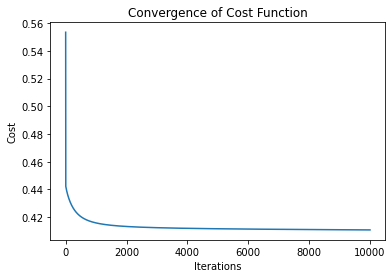

In [11]:
plt.plot(o,r)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence of Cost Function")


In [12]:
predictions = predict(features, weights)
predlab=[]
for i in range(4238):
    pre = decision_boundary(predictions[i])
    predlab.append(pre)
    

predf=np.array(predlab)




In [13]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))




In [14]:
predf=predf.reshape(-1,1)
predf.shape

(4238, 1)

In [15]:
acc=accuracy(predf,labels)
acc*100

85.04011326097216

In [16]:
def precision(preds, labels):
    tp = ((preds == 1) == (labels == 1)).sum()
    fp = ((preds == 1) == (labels == 0)).sum()
    return tp / (tp + fp)

In [17]:
def recall(preds, labels):
    tp = ((preds == 1) == (labels == 1)).sum()
    fn = ((preds == 0) == (labels == 1)).sum()
    return tp / (tp + fn)

In [18]:
def f1(preds, labels):
    return 2 * (precision(preds, labels) * recall(preds, labels)) / (precision(preds, labels) + recall(preds, labels))

In [19]:
f1_score = f1(predf,labels)
f1_score

0.8504011326097216